/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


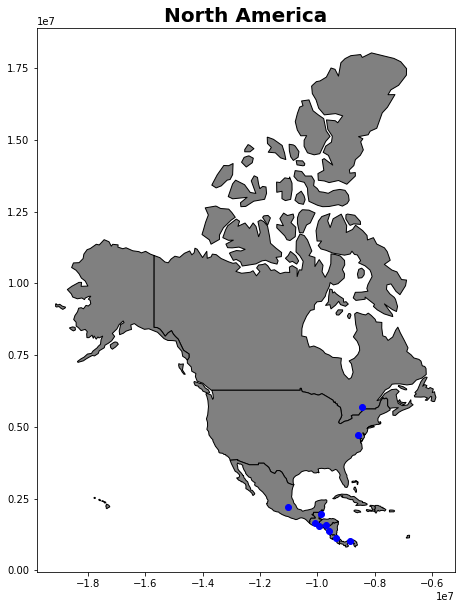

In [27]:
### Install all necessary modules/libraries 
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

### Add magic command that lets figures render in notebooks
%matplotlib inline

### Read in csv of country capitals and coordinates
data = pd.read_csv('capitals.csv')

### Use pandas to read csv data into a DataFrame 
capitols_df = pd.DataFrame(data, columns=['Country','Capital','Lat',
                                          'Lon'])

### Use geopandas to convert capitals DataFrame into a GeoDataFrame 
capitols_gdf = gpd.GeoDataFrame(capitols_df, geometry=gpd.points_from_xy(
    capitols_df.Lon,capitols_df.Lat))

### Set the CRS to WGS 1984 and change it to World Web Mercator projection (EPSG: 3857)
capitols_gdf.set_crs(epsg=4326,inplace=True)
capitols = capitols_gdf.to_crs(epsg=3857)

### Prepare Background for Map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # Read in world shapefile
world = world.to_crs({'init':'epsg:3857'}) #Change projection to match capitols 
NorthAmerica = world[(world.continent == "North America") & (world.name != 'Greenland')] #Isolate North America (except greenland)

### Make a map to visualize North America and the capitol cities 
fig, ax = plt.subplots(1, 1,figsize=(10,10))
NorthAmerica.plot(ax=ax,color='gray', edgecolor='black')
capitols.plot(ax=ax,color="blue")
ax.set_title("North America", fontdict={'fontsize':20, 'fontweight':'bold'})

### Export figure as a PNG
plt.savefig('Assign4_Map.png',dpi=300)